# Exploratory Data Analysis

In [3]:
!python -m spacy download en_core_web_sm

from src.data_loader import DataLoader
from src.preprocessor import Preprocessor
from src.semantic_filter import SemanticFilter
from src.pipeline import Pipeline
import json

# Initialize components
data_loader = DataLoader("../data/collection_with_abstracts.csv")
preprocessor = Preprocessor()
semantic_filter = SemanticFilter()

# Create and run pipeline
pipeline = Pipeline(data_loader, preprocessor, semantic_filter)

results = pipeline.process()

# Get statistics
stats = pipeline.get_statistics()

# Save results
results.to_csv("results/filtered_papers.csv", index=False)

with open("results/statistics.json", "w") as f:
    json.dump(stats, f, indent=2)

# Print summary
print("\nProcessing complete!")
print(f"Found {stats['total_papers']} relevant papers")
print("\nMethod distribution:")

for method, count in stats['method_distribution'].items():
    print(f"{method}: {count}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.3 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Exploration

Dataset Statistics:
Total records: 11450
Records with abstracts: 11237

Initial Filtering Results:
Papers potentially using deep learning: 4405


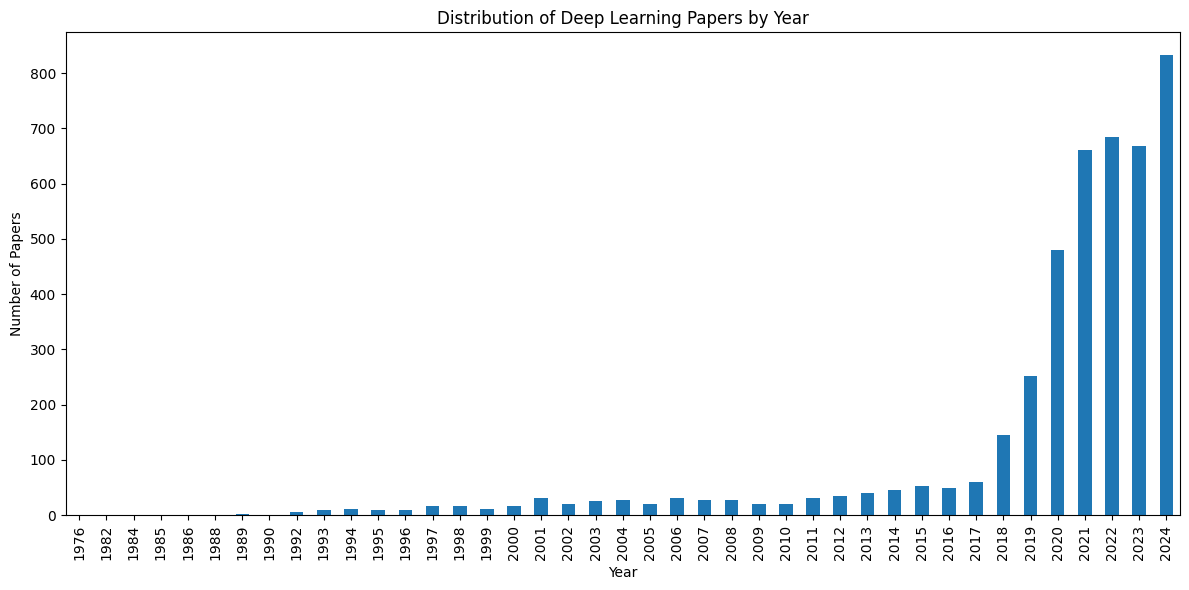

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from src.data_loader import DataLoader
from src.preprocessor import Preprocessor

# Load data
loader = DataLoader("../data/collection_with_abstracts.csv")
df = loader.load_data()

# Get basic stats
stats = loader.get_basic_stats()

print("Dataset Statistics:")
print(f"Total records: {stats['total_records']}")
print(f"Records with abstracts: {stats['records_with_abstract']}")

# Prepare data
df_processed = Preprocessor.prepare_dataset(df)

# Deep learning keywords to look for in abstracts
dl_keywords = [
    'neural network',
    'deep learning', 'deep neural network', 'artificial neural network', 
    'long short-term memory', 'convolutional neural network', 'recurrent neural network', 
    'transformer', 'attention mechanism', 'bert', 
    'autoencoder', 'adversarial network', 'gan', 'reinforcement learning',
    'cnn', 'rnn', 'lstm', 'gpt', 'vae', 'rl', 'dnn', 'ann',
    'convolutional', 'transformer', 'bert', 'attention mechanism'
]

# Check presence of deep learning terms in abstracts
def has_dl_terms(text):
    if pd.isna(text):
        return False
    return any(keyword in text.lower() for keyword in dl_keywords)

df_processed['has_dl'] = df_processed['clean_abstract'].apply(has_dl_terms)

# Print initial filtering results
print("\nInitial Filtering Results:")
print(f"Papers potentially using deep learning: {df_processed['has_dl'].sum()}")

# Plot publication years distribution
plt.figure(figsize=(12, 6))

df_processed[df_processed['has_dl']]['Publication Year'].value_counts().sort_index().plot(kind='bar')

plt.title('Distribution of Deep Learning Papers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.tight_layout()
plt.show()